In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots render inline in Jupyter
%matplotlib inline

# Set visualization style
sns.set(style="whitegrid")


In [2]:
# Load datasets
campaign_df = pd.read_csv('cleaned_campaign_performance.csv')
creator_df = pd.read_csv('cleaned_dataset_creator_profile.csv')


In [4]:
#  feature selection (excluding 'avg_views' as many data are missing so )
features = ['followers', 'engagements', 'avg_comments', 'avg_likes', 'avg_reels_plays']

# Defining feature set and target variable
X = creator_df[features]
y = creator_df['CREDIBILITY SCORE (fraud detection)']


In [5]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# Training Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Predicting
y_pred_dt = dt_model.predict(X_test_scaled)


In [7]:
# Training Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predicting
y_pred_rf = rf_model.predict(X_test_scaled)


In [8]:
# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.2f}")
    print('-'*30)

# Evaluate both models
evaluate_model(y_test, y_pred_dt, "Decision Tree Regressor")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")


Decision Tree Regressor Performance:
MAE: 28.00
MSE: 1424.40
RMSE: 37.74
R2 Score: -0.62
------------------------------
Random Forest Regressor Performance:
MAE: 25.13
MSE: 1009.88
RMSE: 31.78
R2 Score: -0.15
------------------------------


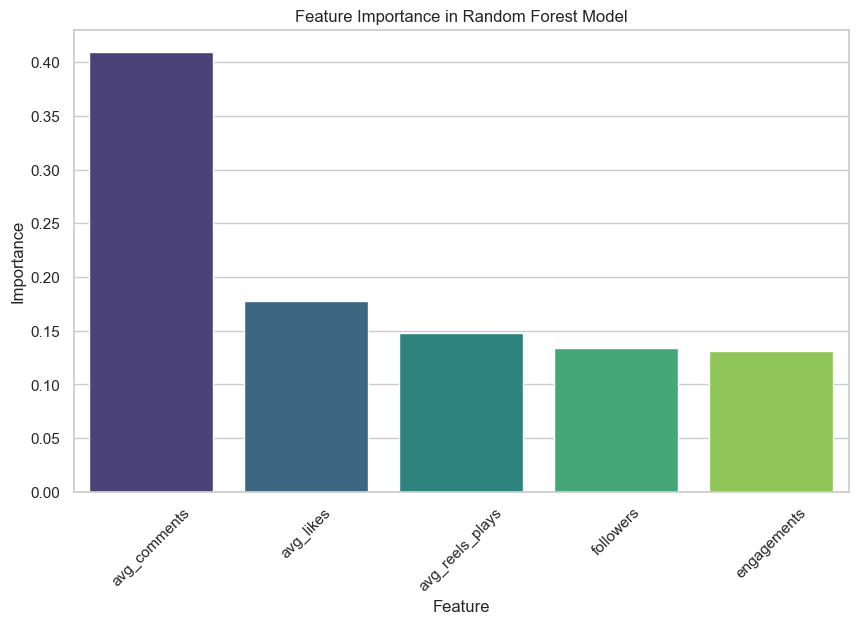

In [9]:
# Plotting feature importance for Random Forest
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=[features[i] for i in indices], y=importances[indices], palette="viridis")
plt.title('Feature Importance in Random Forest Model')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.show()
